import libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

read the data

In [67]:
sales_df = pd.read_csv('Train.csv')


get some info about the data

In [68]:
print(sales_df.shape)
print('------------------------------------------------------------------')
print(sales_df.isnull().sum())
print('------------------------------------------------------------------')
sales_df.describe()

(8523, 12)
------------------------------------------------------------------
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
------------------------------------------------------------------


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


visualise the data

<ipython-input-69-852aa37109af>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_df.Item_Weight)


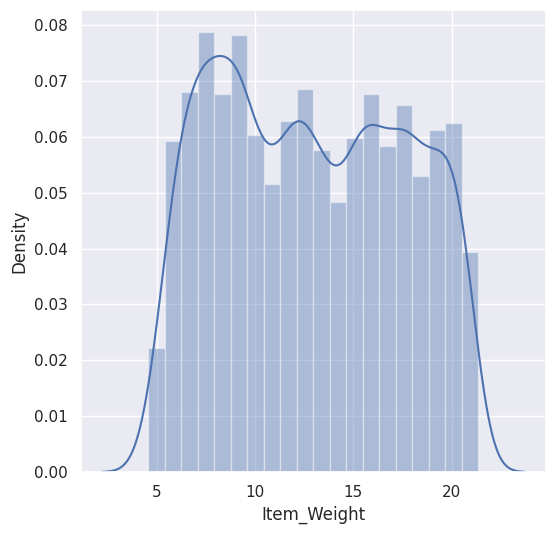

<ipython-input-69-852aa37109af>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_df.Item_Visibility)


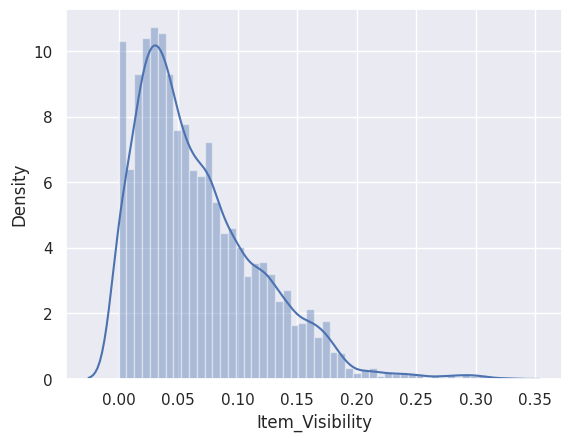

<ipython-input-69-852aa37109af>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_df.Item_MRP)


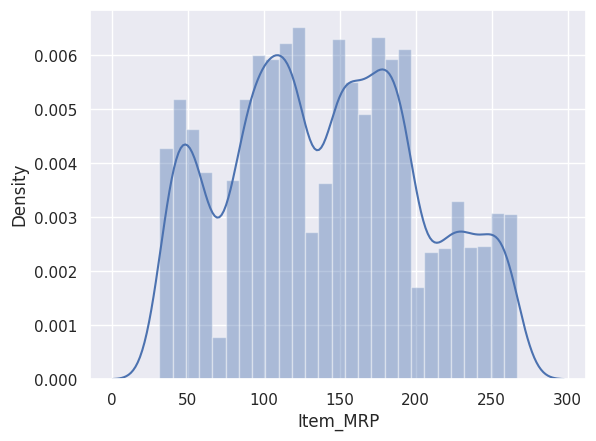

<ipython-input-69-852aa37109af>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_df.Outlet_Establishment_Year)


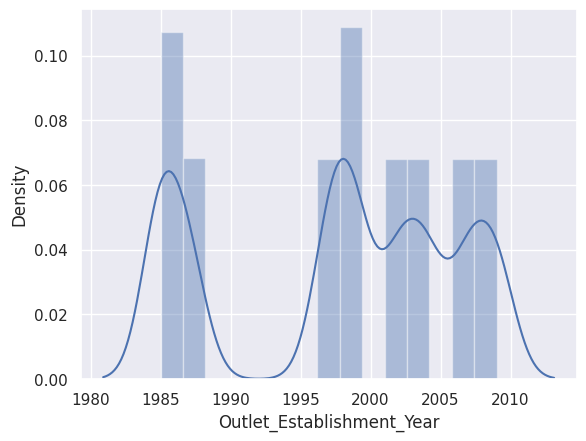

<ipython-input-69-852aa37109af>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_df.Item_Outlet_Sales)


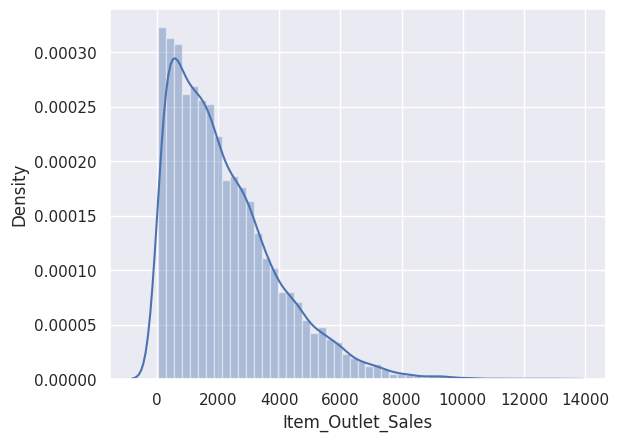

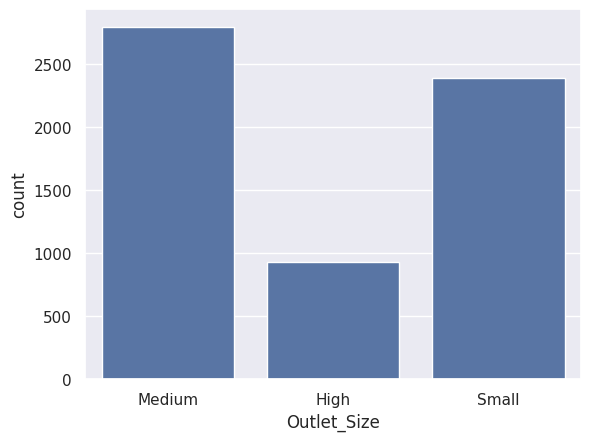

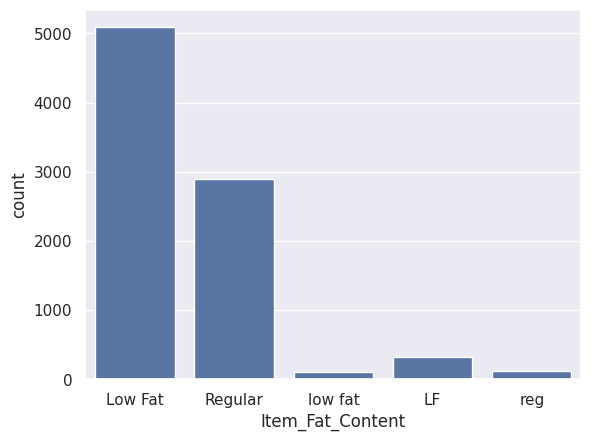

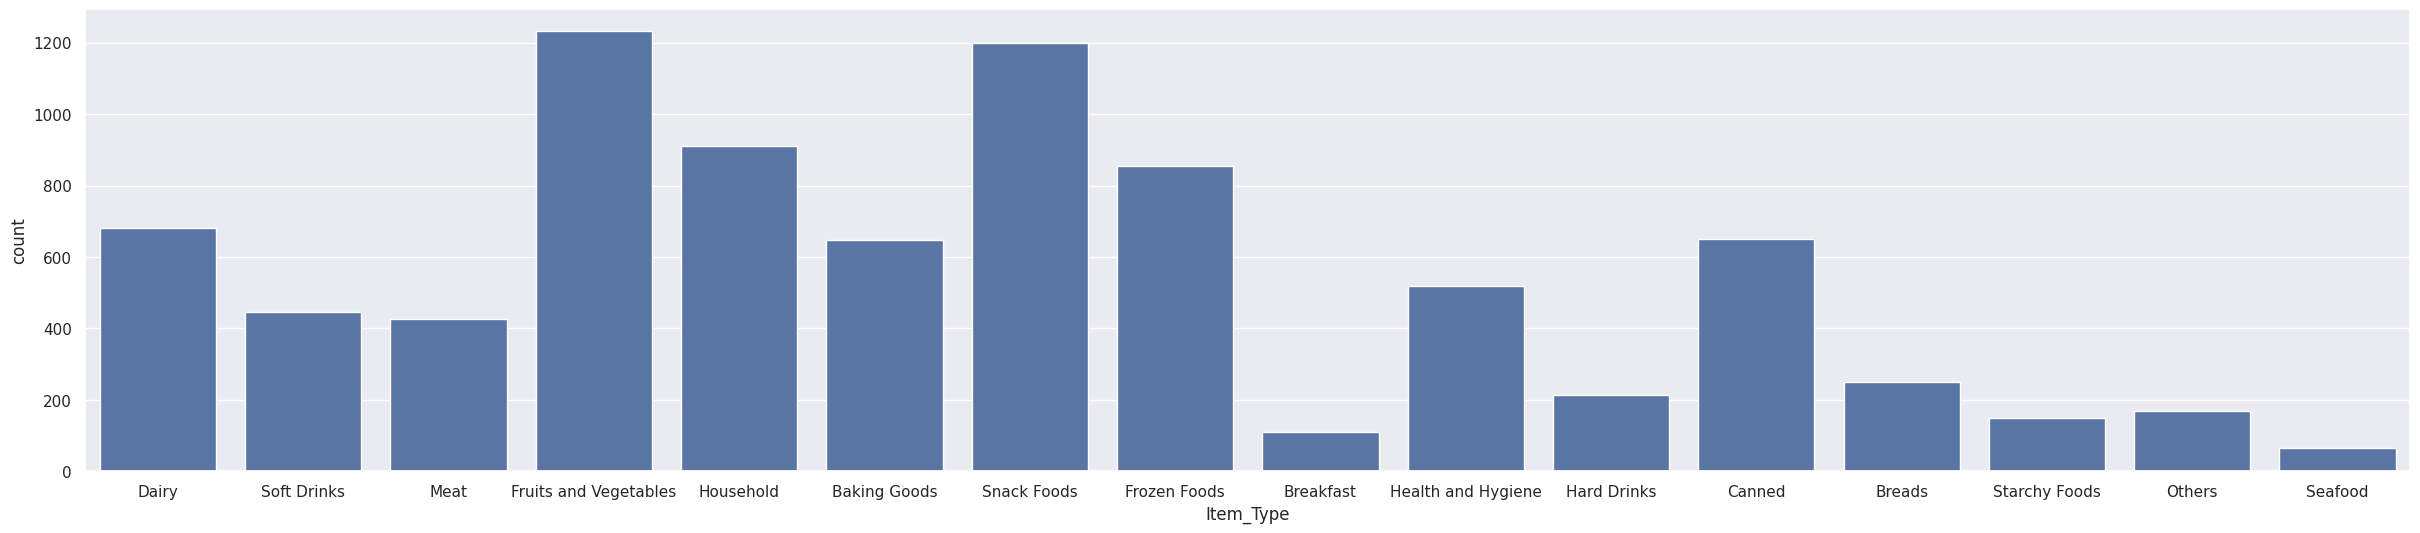

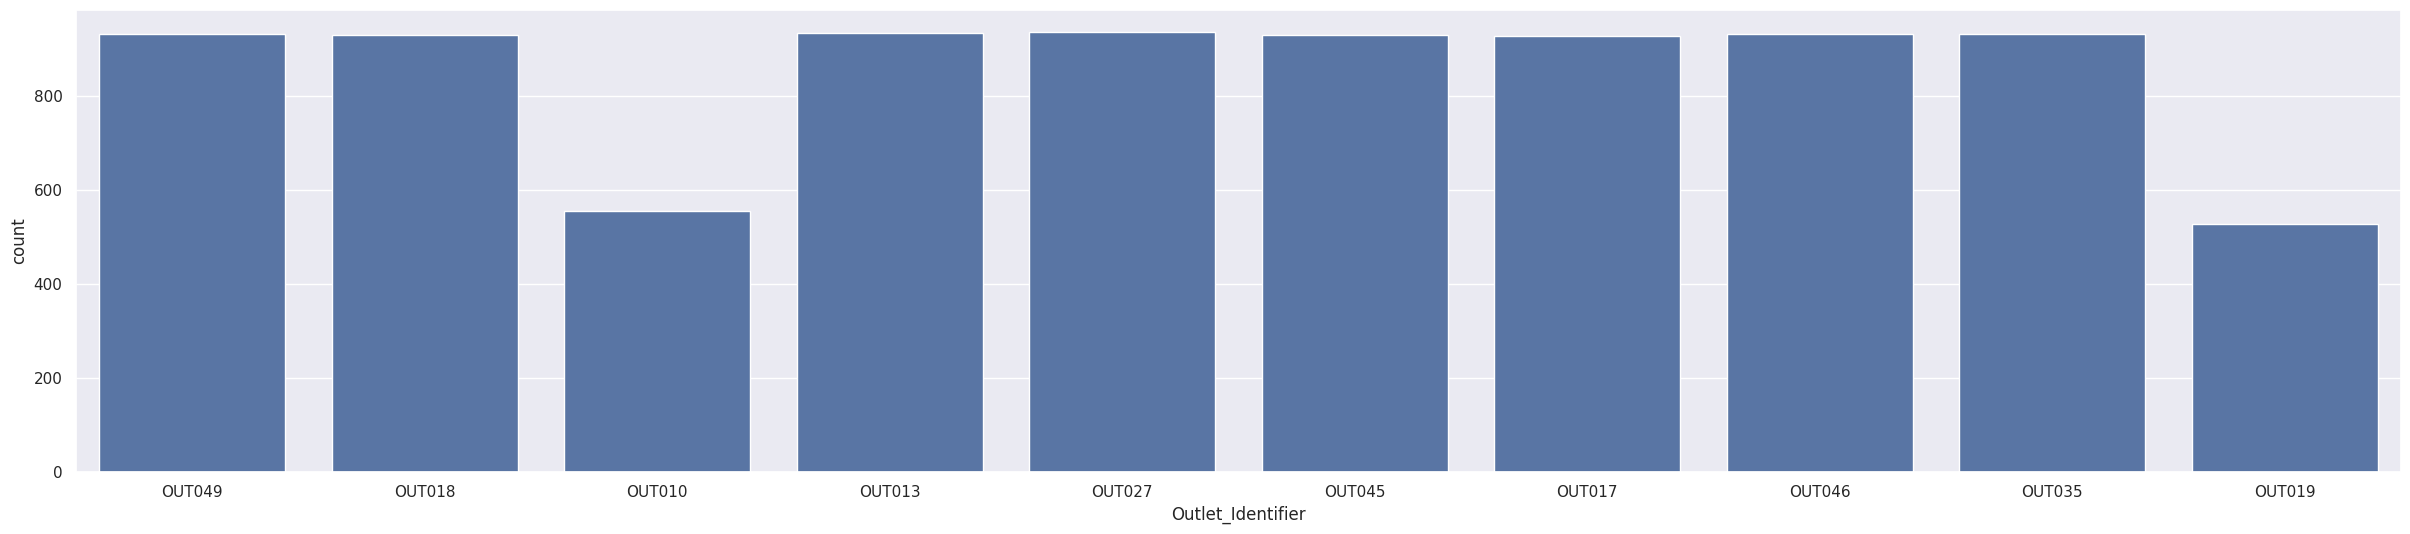

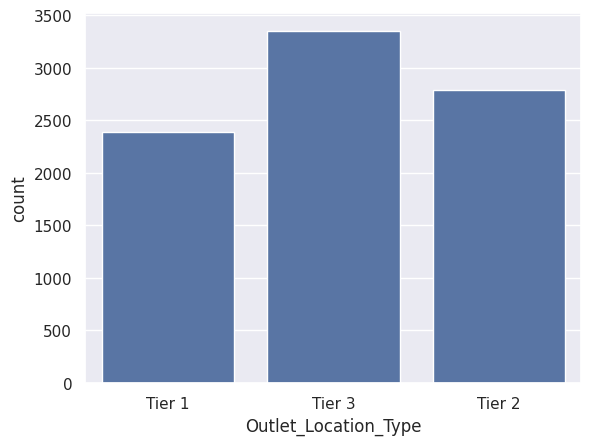

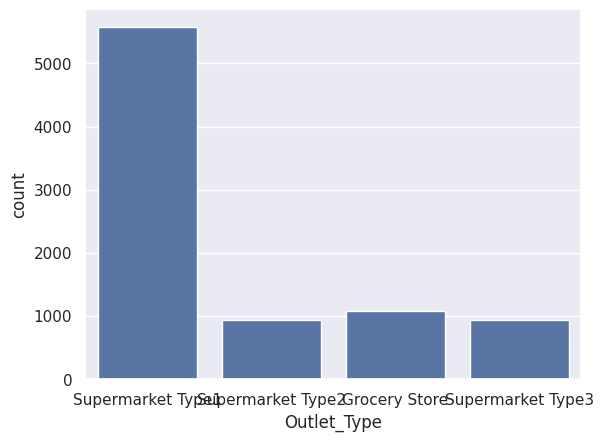

In [69]:
sns.set()
plt.figure(figsize = (6, 6))
sns.distplot(sales_df.Item_Weight)
plt.show()


sns.distplot(sales_df.Item_Visibility)
plt.show()

sns.distplot(sales_df.Item_MRP)
plt.show()

sns.distplot(sales_df.Outlet_Establishment_Year)
plt.show()

sns.distplot(sales_df.Item_Outlet_Sales)
plt.show()

sns.countplot(x = 'Outlet_Size', data = sales_df)
plt.show()

sns.countplot(x = 'Item_Fat_Content', data = sales_df)
plt.show()

plt.figure(figsize = (30, 6))
sns.countplot(x = 'Item_Type', data = sales_df)
plt.show()

plt.figure(figsize = (30, 6))
sns.countplot(x = 'Outlet_Identifier', data = sales_df)
plt.show()

sns.countplot(x = 'Outlet_Location_Type', data = sales_df)
plt.show()

sns.countplot(x = 'Outlet_Type', data = sales_df)
plt.show()

replace missing values

In [70]:
# categorical value will be replace by mode and numerical value is replace by mean since it is close to normal distribution

item_weight_mean = sales_df.Item_Weight.mean()
sales_df.Item_Weight.fillna(item_weight_mean, inplace = True)

item_outlet_size_mode = sales_df.Outlet_Size.mode()[0]
sales_df.Outlet_Size.fillna(item_outlet_size_mode, inplace = True)
sales_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

label encoding

In [71]:
sales_df.replace({'Item_Fat_Content': {'Low Fat': 0, 'Regular': 1, 'LF': 0, 'low fat': 0, 'reg': 1}}, inplace = True)

encoder = LabelEncoder()
sales_df['Item_Type'] = encoder.fit_transform(sales_df.Item_Type)
sales_df['Outlet_Identifier'] = encoder.fit_transform(sales_df.Outlet_Identifier)
sales_df['Outlet_Size'] = encoder.fit_transform(sales_df.Outlet_Size)
sales_df['Outlet_Location_Type'] = encoder.fit_transform(sales_df.Outlet_Location_Type)
sales_df['Outlet_Type'] = encoder.fit_transform(sales_df.Outlet_Type)
sales_df['Item_Identifier'] = encoder.fit_transform(sales_df.Item_Identifier)


sales_df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


split the data, standardising the data


In [116]:
X = sales_df.drop(columns = 'Item_Outlet_Sales', axis = 1)
Y = sales_df.Item_Outlet_Sales
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

create and train the model

In [115]:
xgboost = XGBRegressor()
xgboost.fit(X_train, Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

evaluate the model

In [117]:
Y_train_prediction = xgboost.predict(X_train)
r2_score_train_data = r2_score(Y_train, Y_train_prediction)
print('r2 score for train data =', r2_score_train_data)
rmse_train_data = mean_squared_error(Y_train, Y_train_prediction, squared = False)
print('rmse for train data =', rmse_train_data)

print('------------------------------------------------')
Y_test_prediction = xgboost.predict(X_test)
r2_score_test_data = r2_score(Y_test, Y_test_prediction)
print('r2 score for test data =', r2_score_test_data)
rmse_test_data = mean_squared_error(Y_test, Y_test_prediction, squared = False)
print('rmse for test data =', rmse_test_data)



r2 score for train data = 0.8759287778441955
rmse for train data = 596.4190961660087
------------------------------------------------
r2 score for test data = 0.5060117482714839
rmse for test data = 1234.9002547485018
